In [111]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns 
from datetime import datetime

In [112]:
data = pd.read_csv(r'./src/data/marketing_campaign.csv')

In [113]:
data.columns.value_counts()

ID                     1
NumDealsPurchases      1
Z_Revenue              1
Z_CostContact          1
Complain               1
AcceptedCmp2           1
AcceptedCmp1           1
AcceptedCmp5           1
AcceptedCmp4           1
AcceptedCmp3           1
NumWebVisitsMonth      1
NumStorePurchases      1
NumCatalogPurchases    1
NumWebPurchases        1
MntGoldProds           1
Year_Birth             1
MntSweetProducts       1
MntFishProducts        1
MntMeatProducts        1
MntFruits              1
MntWines               1
Recency                1
Dt_Customer            1
Teenhome               1
Kidhome                1
Income                 1
Marital_Status         1
Education              1
Response               1
Name: count, dtype: int64

In [114]:
df = data.copy()

In [115]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,4/9/2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,8/3/2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/2/2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [116]:
df.shape

(2240, 29)

In [117]:
for i in df.columns:
    print('Name of column {}'.format(i))
    print(df[i].unique())
    print('Number of unique values in {} are {}'.format( i , df[i].nunique()))
    print('Data type :{}'.format(df.dtypes[i]))
    print('count values in {} is {}'.format(i,df[i].count()))
    print('---------')

Name of column ID
[5524 2174 4141 ... 7270 8235 9405]
Number of unique values in ID are 2240
Data type :int64
count values in ID is 2240
---------
Name of column Year_Birth
[1957 1954 1965 1984 1981 1967 1971 1985 1974 1950 1983 1976 1959 1952
 1987 1946 1980 1949 1982 1979 1951 1969 1986 1989 1963 1970 1973 1943
 1975 1996 1968 1964 1977 1978 1955 1966 1988 1948 1958 1972 1960 1945
 1991 1962 1953 1961 1956 1992 1900 1893 1990 1947 1899 1993 1994 1941
 1944 1995 1940]
Number of unique values in Year_Birth are 59
Data type :int64
count values in Year_Birth is 2240
---------
Name of column Education
['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
Number of unique values in Education are 5
Data type :object
count values in Education is 2240
---------
Name of column Marital_Status
['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']
Number of unique values in Marital_Status are 8
Data type :object
count values in Marital_Status is 2240
---------
Name of column Incom

In [118]:
df.describe(include='O')

,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,31-08-2012
freq,1127,864,12


TypeError: 'Axes' object is not subscriptable

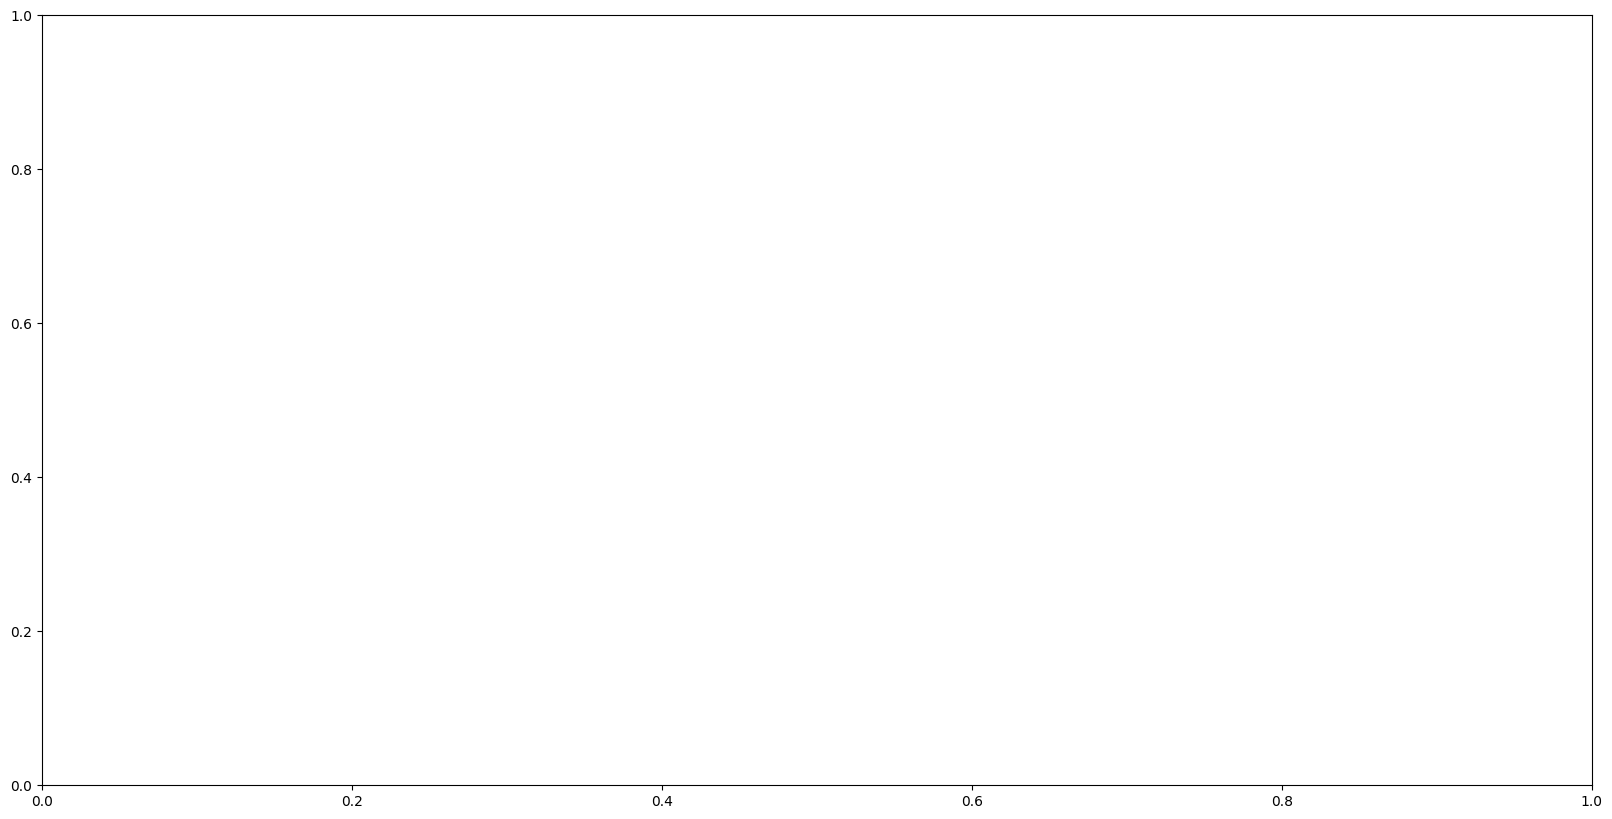

In [119]:
fig,ax=plt.subplots(1,1,figsize=(20,10))
sns.countplot(data=df,x='Marital_Status',ax=ax[0][0])
sns.countplot(data=df,x='Education',ax=ax[0][1])


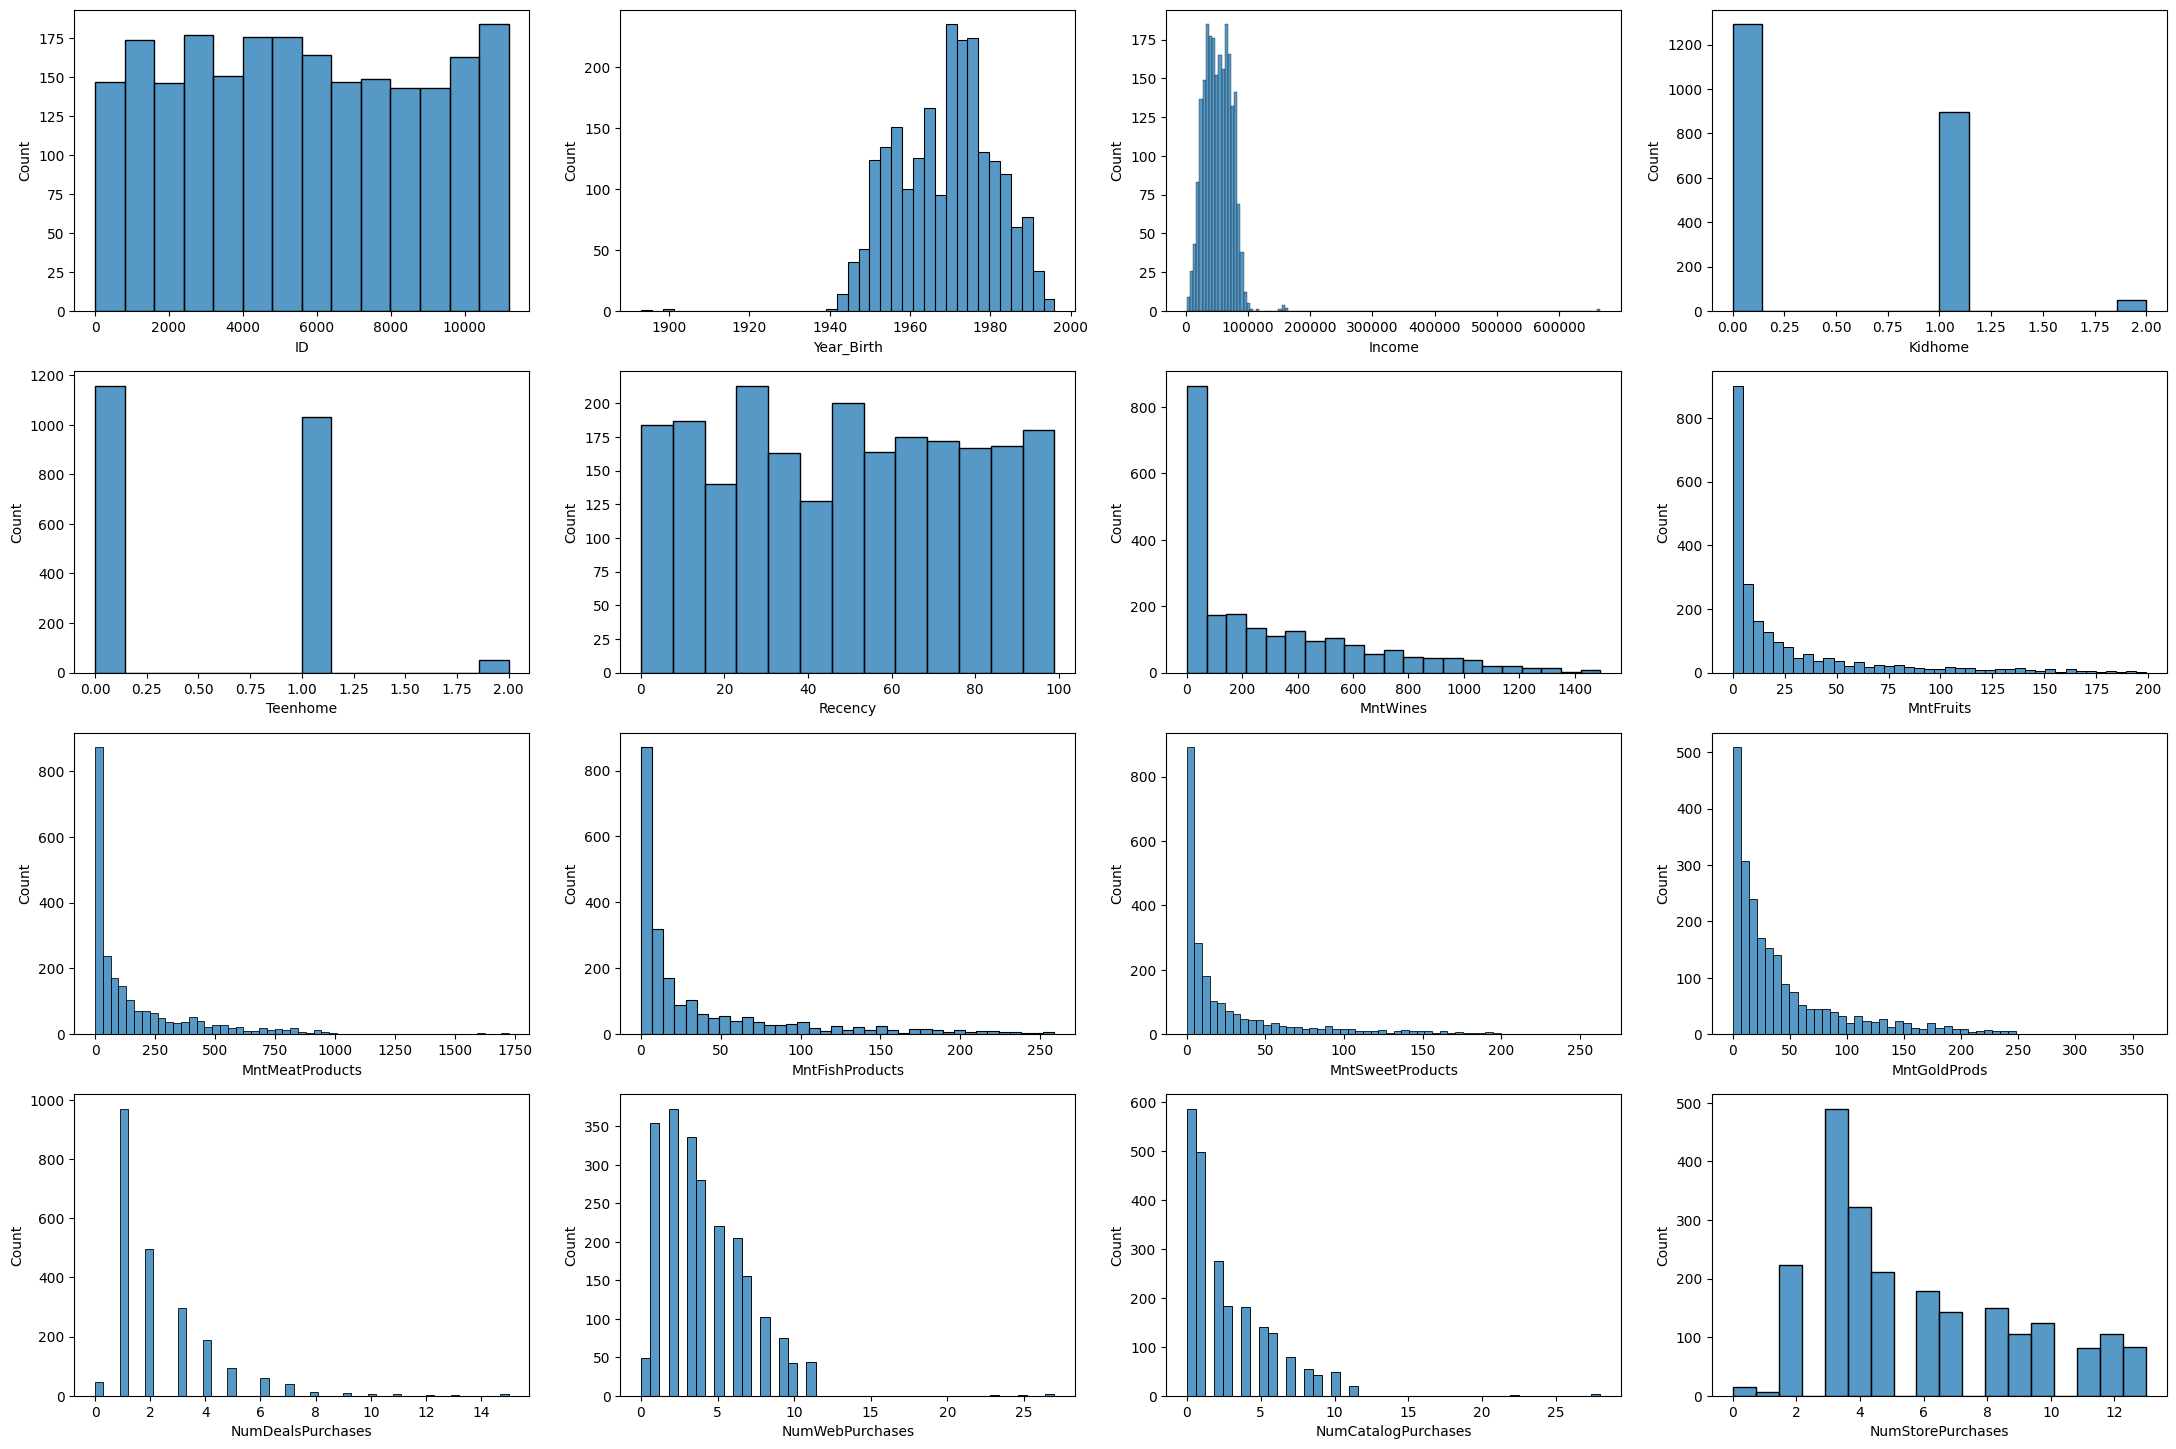

In [120]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
len(numerical_cols)
fig,ax=plt.subplots(4,4,figsize=(27,18))
for i in range(0,4):
    for j in range(0,4):
        sns.histplot(data=df,x=numerical_cols[i*4+j],ax=ax[i][j])

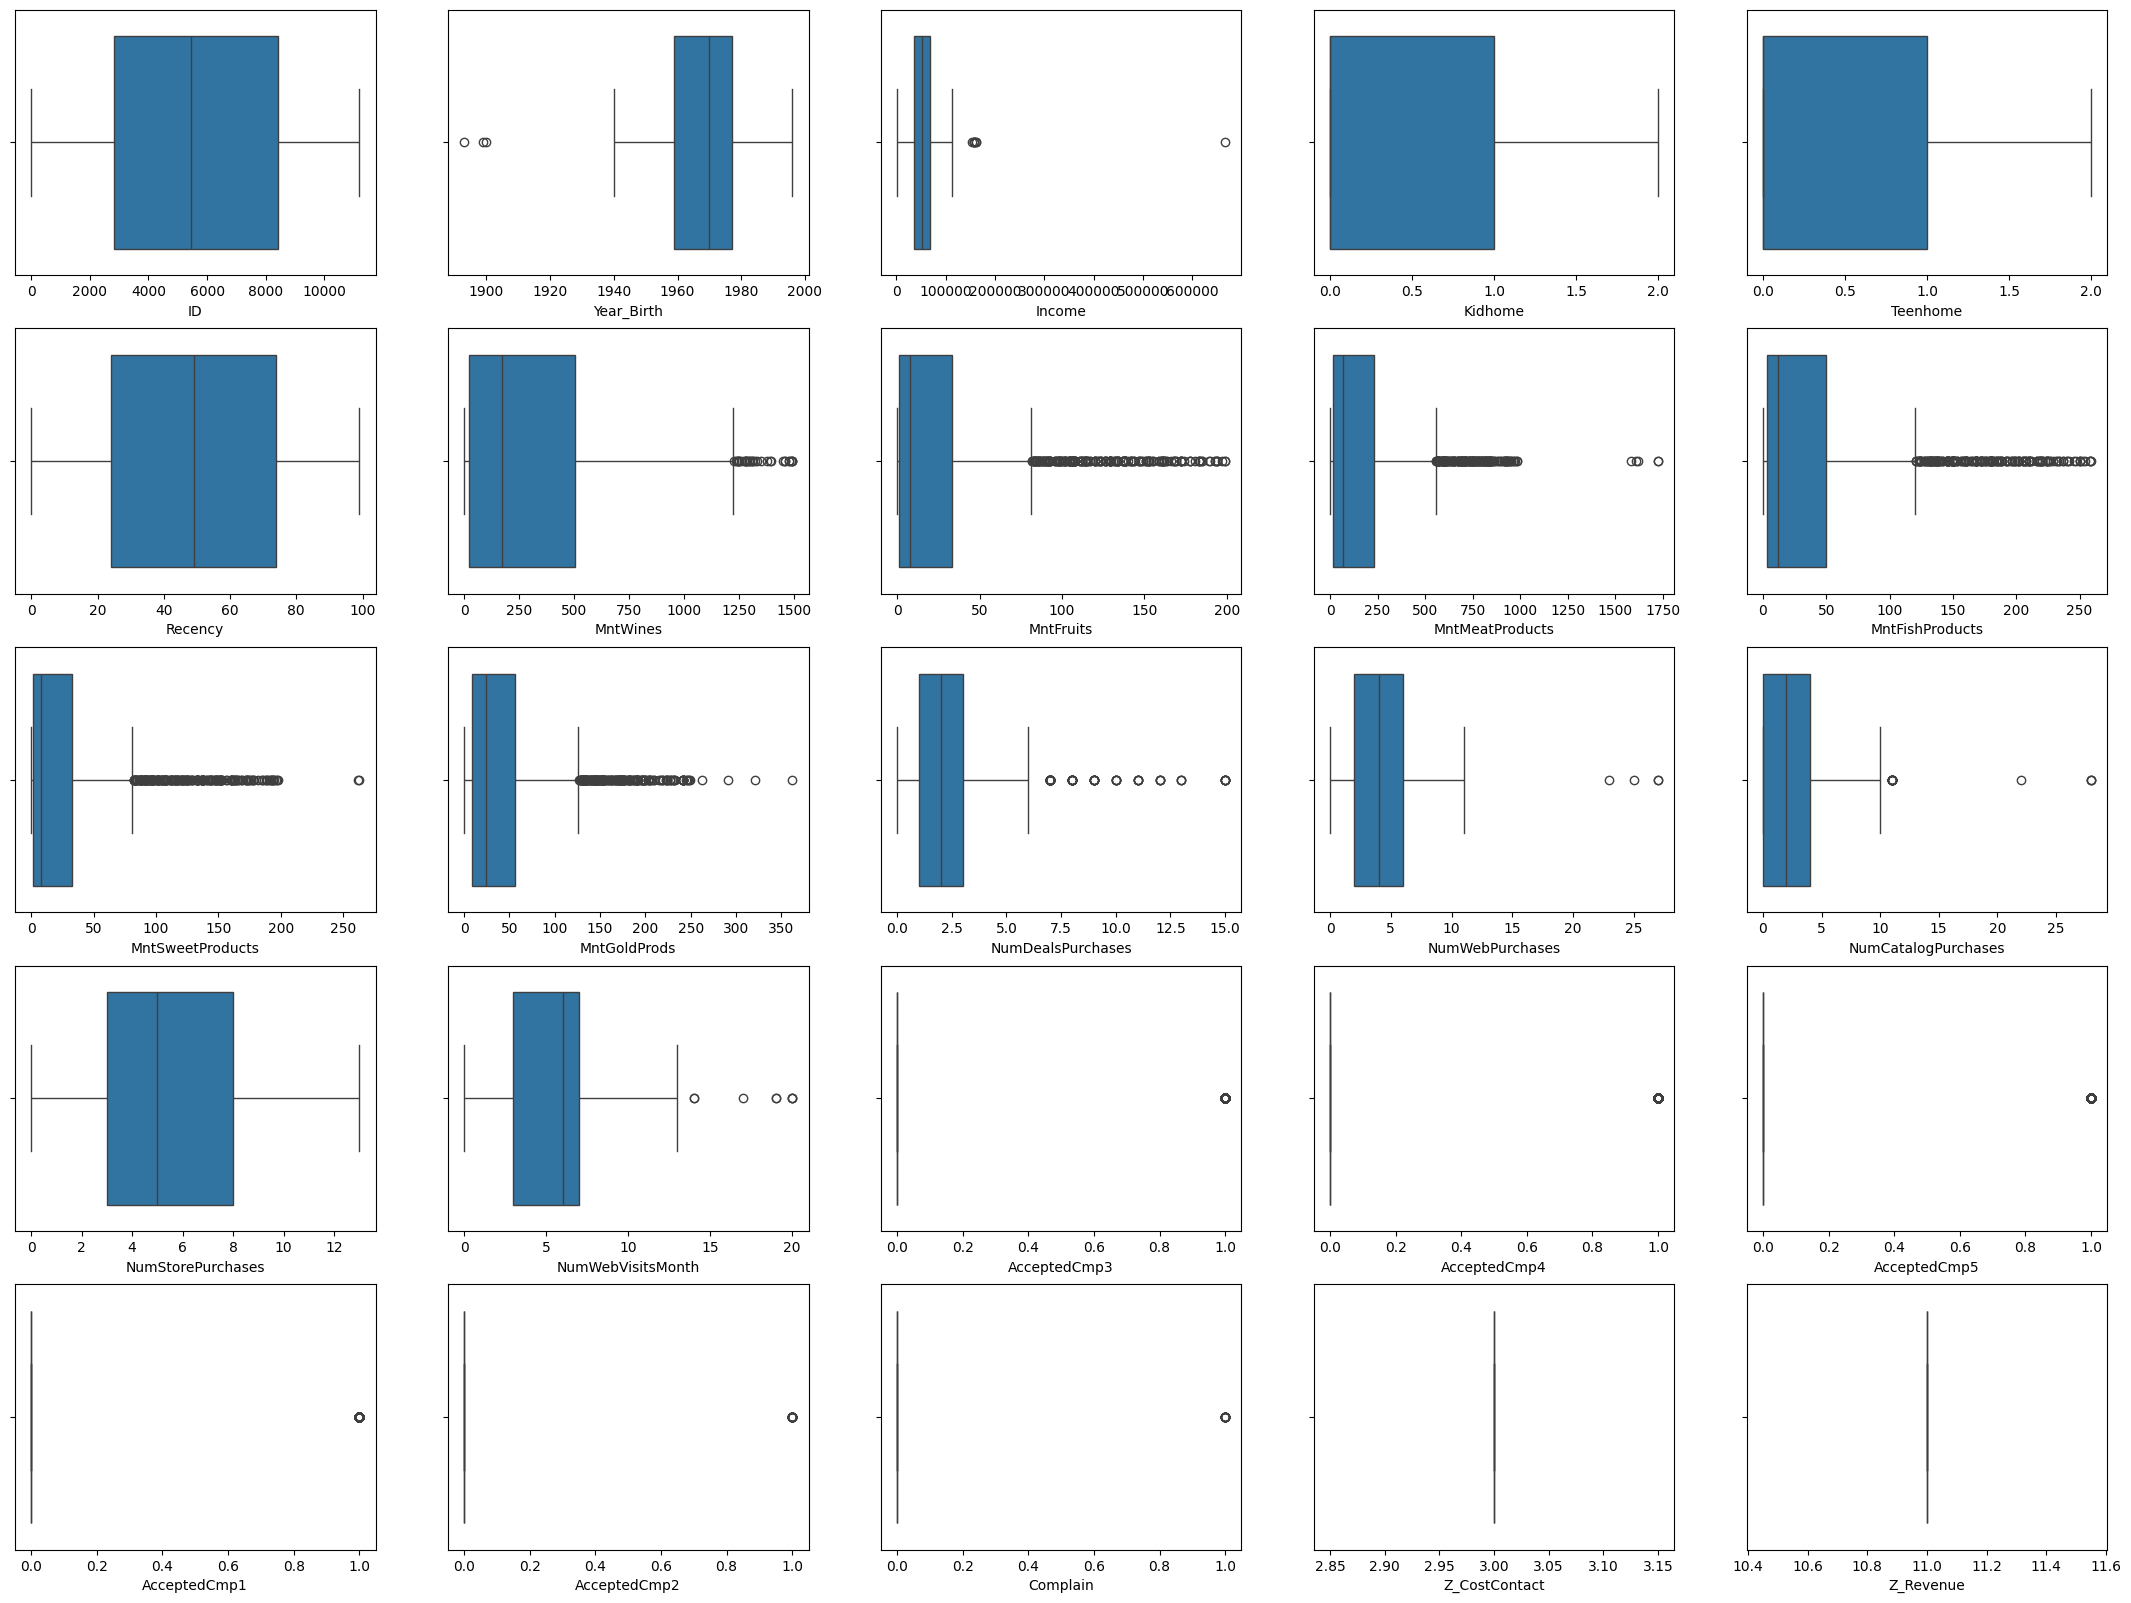

In [121]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

fig,ax=plt.subplots(5,5,figsize=(27,20))
for i in range(0,5):
    for j in range(0,5):
        sns.boxplot(data=df,x=numerical_cols[i*5+j],ax=ax[i][j])

In [122]:
mask=(df['Year_Birth']>1920)&(df['Income']<300000)&(df['MntMeatProducts']<1250)&(df['MntGoldProds']<250)&(df['NumWebPurchases']<20)&(df['NumCatalogPurchases']<15)&(df['NumWebVisitsMonth']<15)

In [123]:
df['Education'].value_counts()
h={'Basic':1,'Graduation':2,'2n Cycle':3,'Master':4,'PhD':5}
df['Education']=df['Education'].map(h)


In [124]:
df['Marital_Status'].value_counts()

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [ ]:
categories_to_remove = ['Alone', 'Absurd', 'YOLO']

# Filter the DataFrame to exclude the specified categories
df = df[~df['Marital_Status'].isin(categories_to_remove)]
continous_cols=[]
for i in df.columns:
    if df[i].nunique()>5:
        continous_cols.append(i)    

non_changed_cols=list(df.columns)
for i in continous_cols:
    non_changed_cols.remove(i)
    
non_changed_cols.remove('Marital_Status')
